## IMPORT BILBIOTEK


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import itertools as it
import operator as op
import pandas as pd
import numpy as np
import morfeusz2
import string
import json
import nltk
import sys
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
print(sys.version)

3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Scotty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Scotty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Scotty\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     C:\Users\Scotty\AppData\Roaming\nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


Korpus dokumentów

In [2]:
corpus_dir = "./streszczenia_original"
corpus = PlaintextCorpusReader(corpus_dir, ".*\\.txt")
files_names = corpus.fileids()
files_names

['Harry Potter i Czara Ognia.txt',
 'Harry Potter i Insygnia Smierci.txt',
 'Harry Potter i Kamien Filozoficzny.txt',
 'Harry Potter i Komnata Tajemnic.txt',
 'Harry Potter i Ksiaze Polkrwi.txt',
 'Harry Potter i Przeklete Dziecko.txt',
 'Harry Potter i Wiezien Azkabanu.txt',
 'Harry Potter i Zakon Feniksa.txt',
 'Opowiesci z Narni. Kon i jego chlopiec.txt',
 'Opowiesci z Narni. Ksiaze Kaspian.txt',
 'Opowiesci z Narni. Lew, czarownica i stara szafa.txt',
 'Opowiesci z Narni. Ostatnia bitwa.txt',
 'Opowiesci z Narni. Podroz Wedrowca do Switu.txt',
 'Opowiesci z Narni. Siostrzeniec Czarodzieja.txt',
 'Opowiesci z Narni. Srebrne krzeslo.txt',
 'Zmierzch.Ksiezyc w Nowiu.txt',
 'Zmierzch.Przed Switem.txt',
 'Zmierzch.Zacmienie.txt',
 'Zmierzch.Zmierzch.txt',
 'Zmierzch.Zycie i Smierc.txt']

# Wstępne przygotowanie dokumentów

In [3]:
documents = {}
for file in files_names:
    documents[file] = corpus.raw(file)
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "Lord Voldemort, wraz ze swoim sługą Glizdogonem przybywa do domu należącego niegdyś do rodziny Riddle'ów położonego w Little Hangleton. Tam układają plan dotyczący zamordowania Harry'ego Pottera, co ma pomóc Czarnemu Panu w odzyskaniu jego dawnej mocy. Jest także mowa o wiernym słudze Czarnego Pana, który wkrótce ma znaleźć się w Hogwarcie. Wszystko to słyszy mieszkający nieopodal ogrodnik, Frank Bryce. Voldemort odkrywając, iż mężczyzna podsłuchuje, zaprasza go do środka i uśmierca. Harry budzi się z przerażającego snu. Jego blizna pulsuje okropnym bólem. Próbuje sobie przypomnieć o czym śnił, a z pamięci wyłania się obraz mrocznego pokoju, węża leżącego przed kominkiem oraz Glizdogona i Lorda Voldemorta planujących morderstwo. Harry zastanawia się czy powinien komuś powiedzieć o problemach z blizną, ponieważ, gdy bolała go ostatnim razem, Voldemort wdarł się do Hogwartu. Ostatecznie postanawia napisać do Syriusza i zejść na śniadanie. W trakci

In [4]:
stoplist_file = open("./stopwords_pl.txt", "r", encoding="UTF-8")
stoplist = stoplist_file.read().splitlines()
stoplist_file.close()
stoplist = stoplist[4:]
stoplist

['vol',
 'o.o.',
 'mgr',
 'godz',
 'zł',
 'www',
 'pl',
 'ul',
 'tel',
 'hab',
 'prof',
 'inż',
 'dr',
 'i',
 'u',
 'aby',
 'albo',
 'ale',
 'ani',
 'aż',
 'bardzo',
 'bez',
 'bo',
 'bowiem',
 'by',
 'byli',
 'bym',
 'był',
 'była',
 'było',
 'były',
 'być',
 'będzie',
 'będą',
 'chce',
 'choć',
 'co',
 'coraz',
 'coś',
 'czy',
 'czyli',
 'często',
 'dla',
 'do',
 'gdy',
 'gdyby',
 'gdyż',
 'gdzie',
 'go',
 'ich',
 'im',
 'inne',
 'iż',
 'ja',
 'jak',
 'jakie',
 'jako',
 'je',
 'jednak',
 'jednym',
 'jedynie',
 'jego',
 'jej',
 'jest',
 'jeszcze',
 'jeśli',
 'jeżeli',
 'już',
 'ją',
 'kiedy',
 'kilku',
 'kto',
 'która',
 'które',
 'którego',
 'której',
 'który',
 'których',
 'którym',
 'którzy',
 'lat',
 'lecz',
 'lub',
 'ma',
 'mają',
 'mamy',
 'mi',
 'miał',
 'mimo',
 'mnie',
 'mogą',
 'może',
 'można',
 'mu',
 'musi',
 'na',
 'nad',
 'nam',
 'nas',
 'nawet',
 'nic',
 'nich',
 'nie',
 'niej',
 'nim',
 'niż',
 'no',
 'nowe',
 'np',
 'nr',
 'o',
 'od',
 'ok',
 'on',
 'one',
 'oraz',
 '

morf = morfeusz2.Morfeusz()
print(morf.analyse("Ala ma kota"))

In [5]:
def lemmatize(text):
    morf = morfeusz2.Morfeusz()
    segments = it.groupby(morf.analyse(text), op.itemgetter(0,1))
    def disambiguate(group):
        pairs = [(len(descr), lemma) for _, _, (_, lemma, descr, _, _) in group]
        perpl, lemma=min(pairs)
        return lemma.split(":")[0]
    lemmas = (disambiguate(group) for key, group in segments)
    return " ".join(filter(str.isalpha, lemmas))
            

In [6]:
for key in documents:
    documents[key] = documents[key].lower()
    documents[key] = "".join([char for char in documents[key] if char not in string.punctuation])
    documents[key] = lemmatize(documents[key])
    documents[key] = " ".join([word for word in 
                               word_tokenize(documents[key],
                                              language="polish")
                                 if word not in stoplist])
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "lord voldemort wraz sługa glizdogonem przybywać dom należący niegdyś rodzina riddleów położony little hangleton układać plan dotyczyć zamordować harryego pottera mieć pomóc czarny odzyskanie dawny moc mowa wierna sługa czarny wkrótce mieć znaleźć hogwarcie słyszeć mieszkać nieopodal ogrodnik frank bryka voldemort odkrywać mężczyzna podsłuchiwać zapraszać środek uśmiercać Harry budzić przerażający sen blizna pulsować okropny ból próbować siebie przypomnieć czym śnić a pamięć wyłaniać obraza mroczny pokój wąż leżący kominek glizdogona lord voldemorta planować morderstwo Harry zastanawiać powinien ktoś powiedzieć problem blizna boleć ostatni razem voldemort wedrzeć hogwartu ostatecznie postanawiać napisać Syriusz zejść śniadanie trakt śniadanie wuj vernon otrzymywać lista weasleyowie oferować zabrać harryego finał mistrzostwa świat quidditchu ugościć reszta wakacje długi namysł użycie harryego odpowiedni argument wuj zgadzać wyjazd pokój Harry zast

In [7]:
morf = morfeusz2.Morfeusz()
print(morf.analyse("Ala ma kota"))

[(0, 1, ('Ala', 'Ala', 'subst:sg:nom:f', ['imię'], [])), (0, 1, ('Ala', 'Al', 'subst:sg:gen.acc:m1', ['imię'], [])), (0, 1, ('Ala', 'Alo', 'subst:sg:gen.acc:m1', ['imię'], [])), (1, 2, ('ma', 'mieć', 'fin:sg:ter:imperf', [], [])), (1, 2, ('ma', 'mój:A', 'adj:sg:nom.voc:f:pos', [], [])), (2, 3, ('kota', 'kota', 'subst:sg:nom:f', ['nazwa_pospolita'], [])), (2, 3, ('kota', 'kot:Sm1', 'subst:sg:gen.acc:m1', ['nazwa_pospolita'], ['pot.,środ.'])), (2, 3, ('kota', 'kot:Sm2', 'subst:sg:gen.acc:m2', ['nazwa_pospolita'], []))]


# Utworzenie macierzy częstości



In [8]:
docs = pd.DataFrame.from_dict(documents, orient='index')
docs.columns = ['content']

In [9]:
count_vectorizer = CountVectorizer()
counts_tf = count_vectorizer.fit_transform(docs['content'])
counts_tf.toarray()

tfidf_vectorizer = TfidfVectorizer()
counts_tfidf = tfidf_vectorizer.fit_transform(docs['content'])
counts_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00762238,
        0.        ],
       [0.        , 0.03080164, 0.        , ..., 0.        , 0.01221555,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04321792, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Chmury tagów

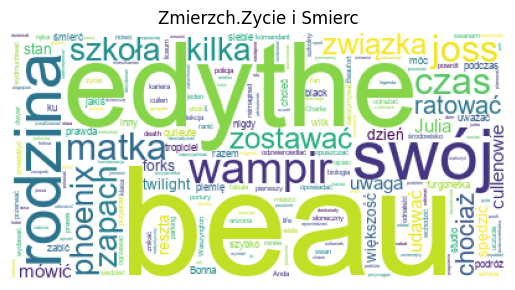

In [10]:
sys_font_path = "C:\Windows\Fonts\Arial.ttf"
wordcloud = WordCloud(
    background_color="white",
    max_words=5000,
    contour_width=3, 
    contour_color="steelblue",
    font_path=sys_font_path
)
for index, row in docs.iterrows():
    wordcloud.generate(row['content'])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(index.replace(".txt", ""))
    plt.savefig("./wordclouds/{}".format(index.replace(".txt", ".png")))

## Topic modelling

In [11]:
n_components = 5
feature_names = count_vectorizer.get_feature_names_out()
n_top_features = 20
size = [1,5]

In [12]:
def plot_top_words(model, feature_names, n_top_words, title, subplots):
    fig, axes = plt.subplots(*subplots, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig(f"./topics/{title}.png")

In [13]:
n_components = 3
feature_names = count_vectorizer.get_feature_names_out()
n_top_features = 20
size = [1,3]

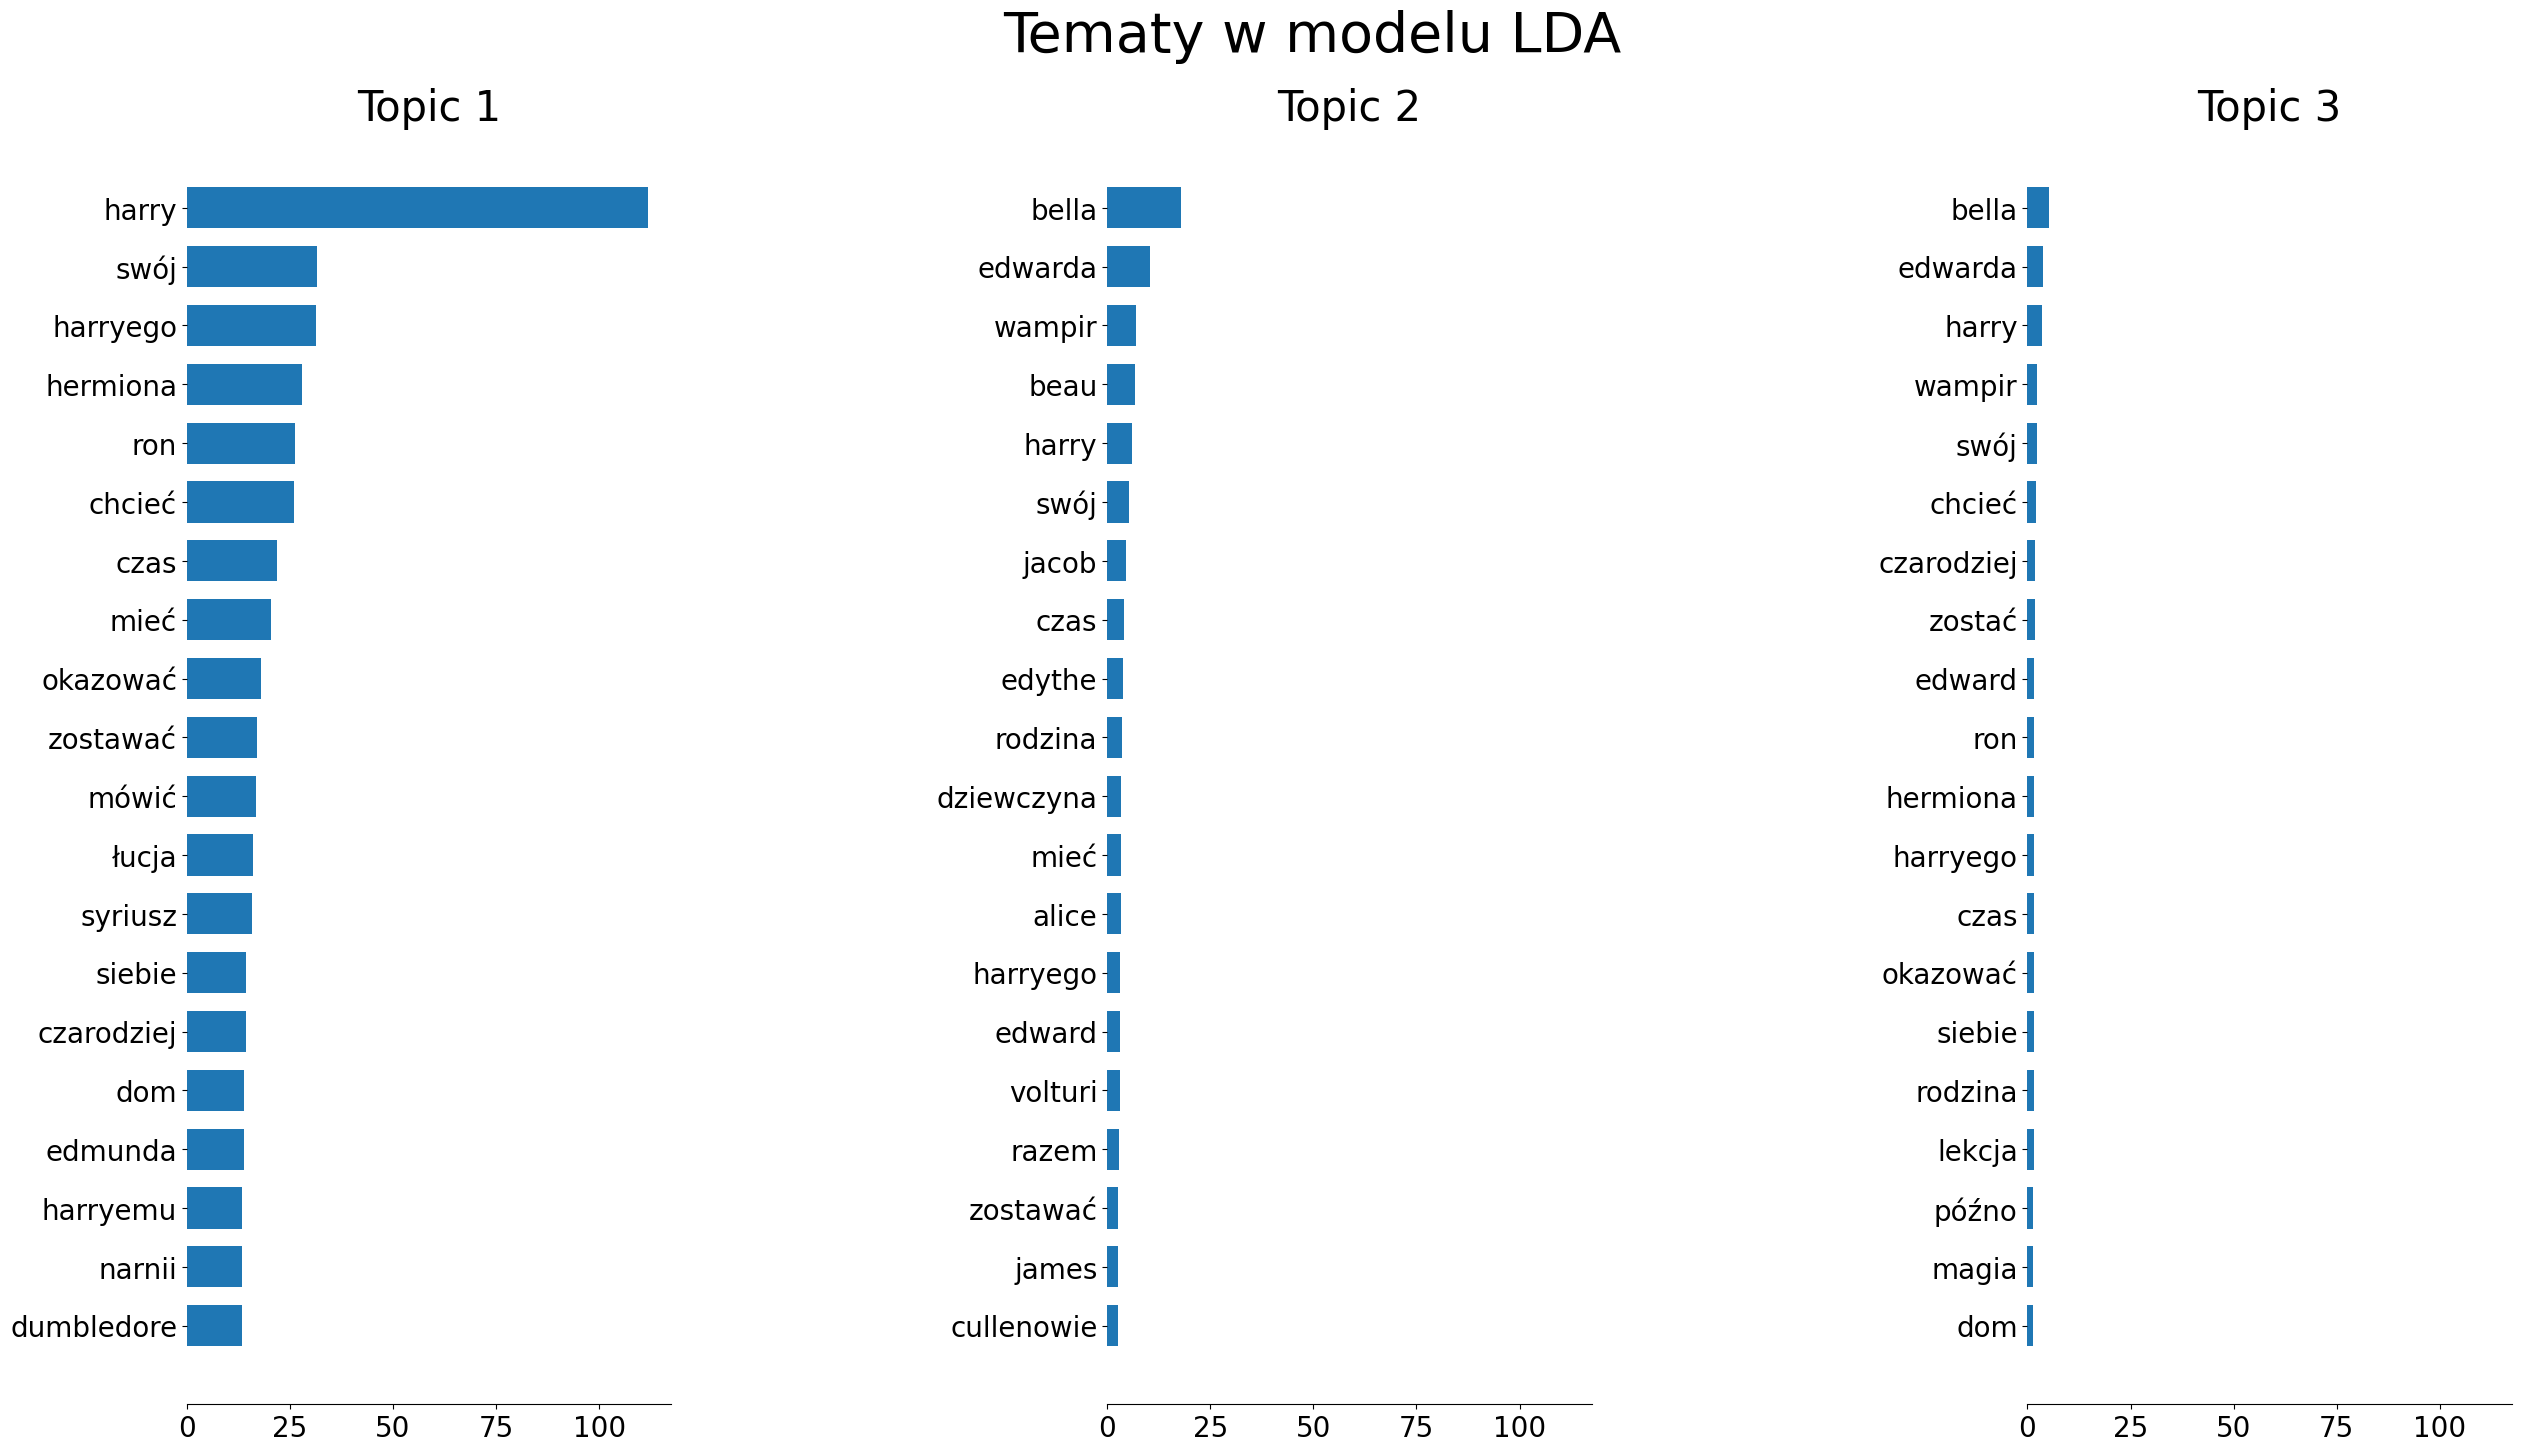

In [14]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method='online',
    learning_offset=50,
    random_state=0
)
lda.fit(counts_tf)
plot_top_words(lda, feature_names, n_top_features, "Tematy w modelu LDA", size)

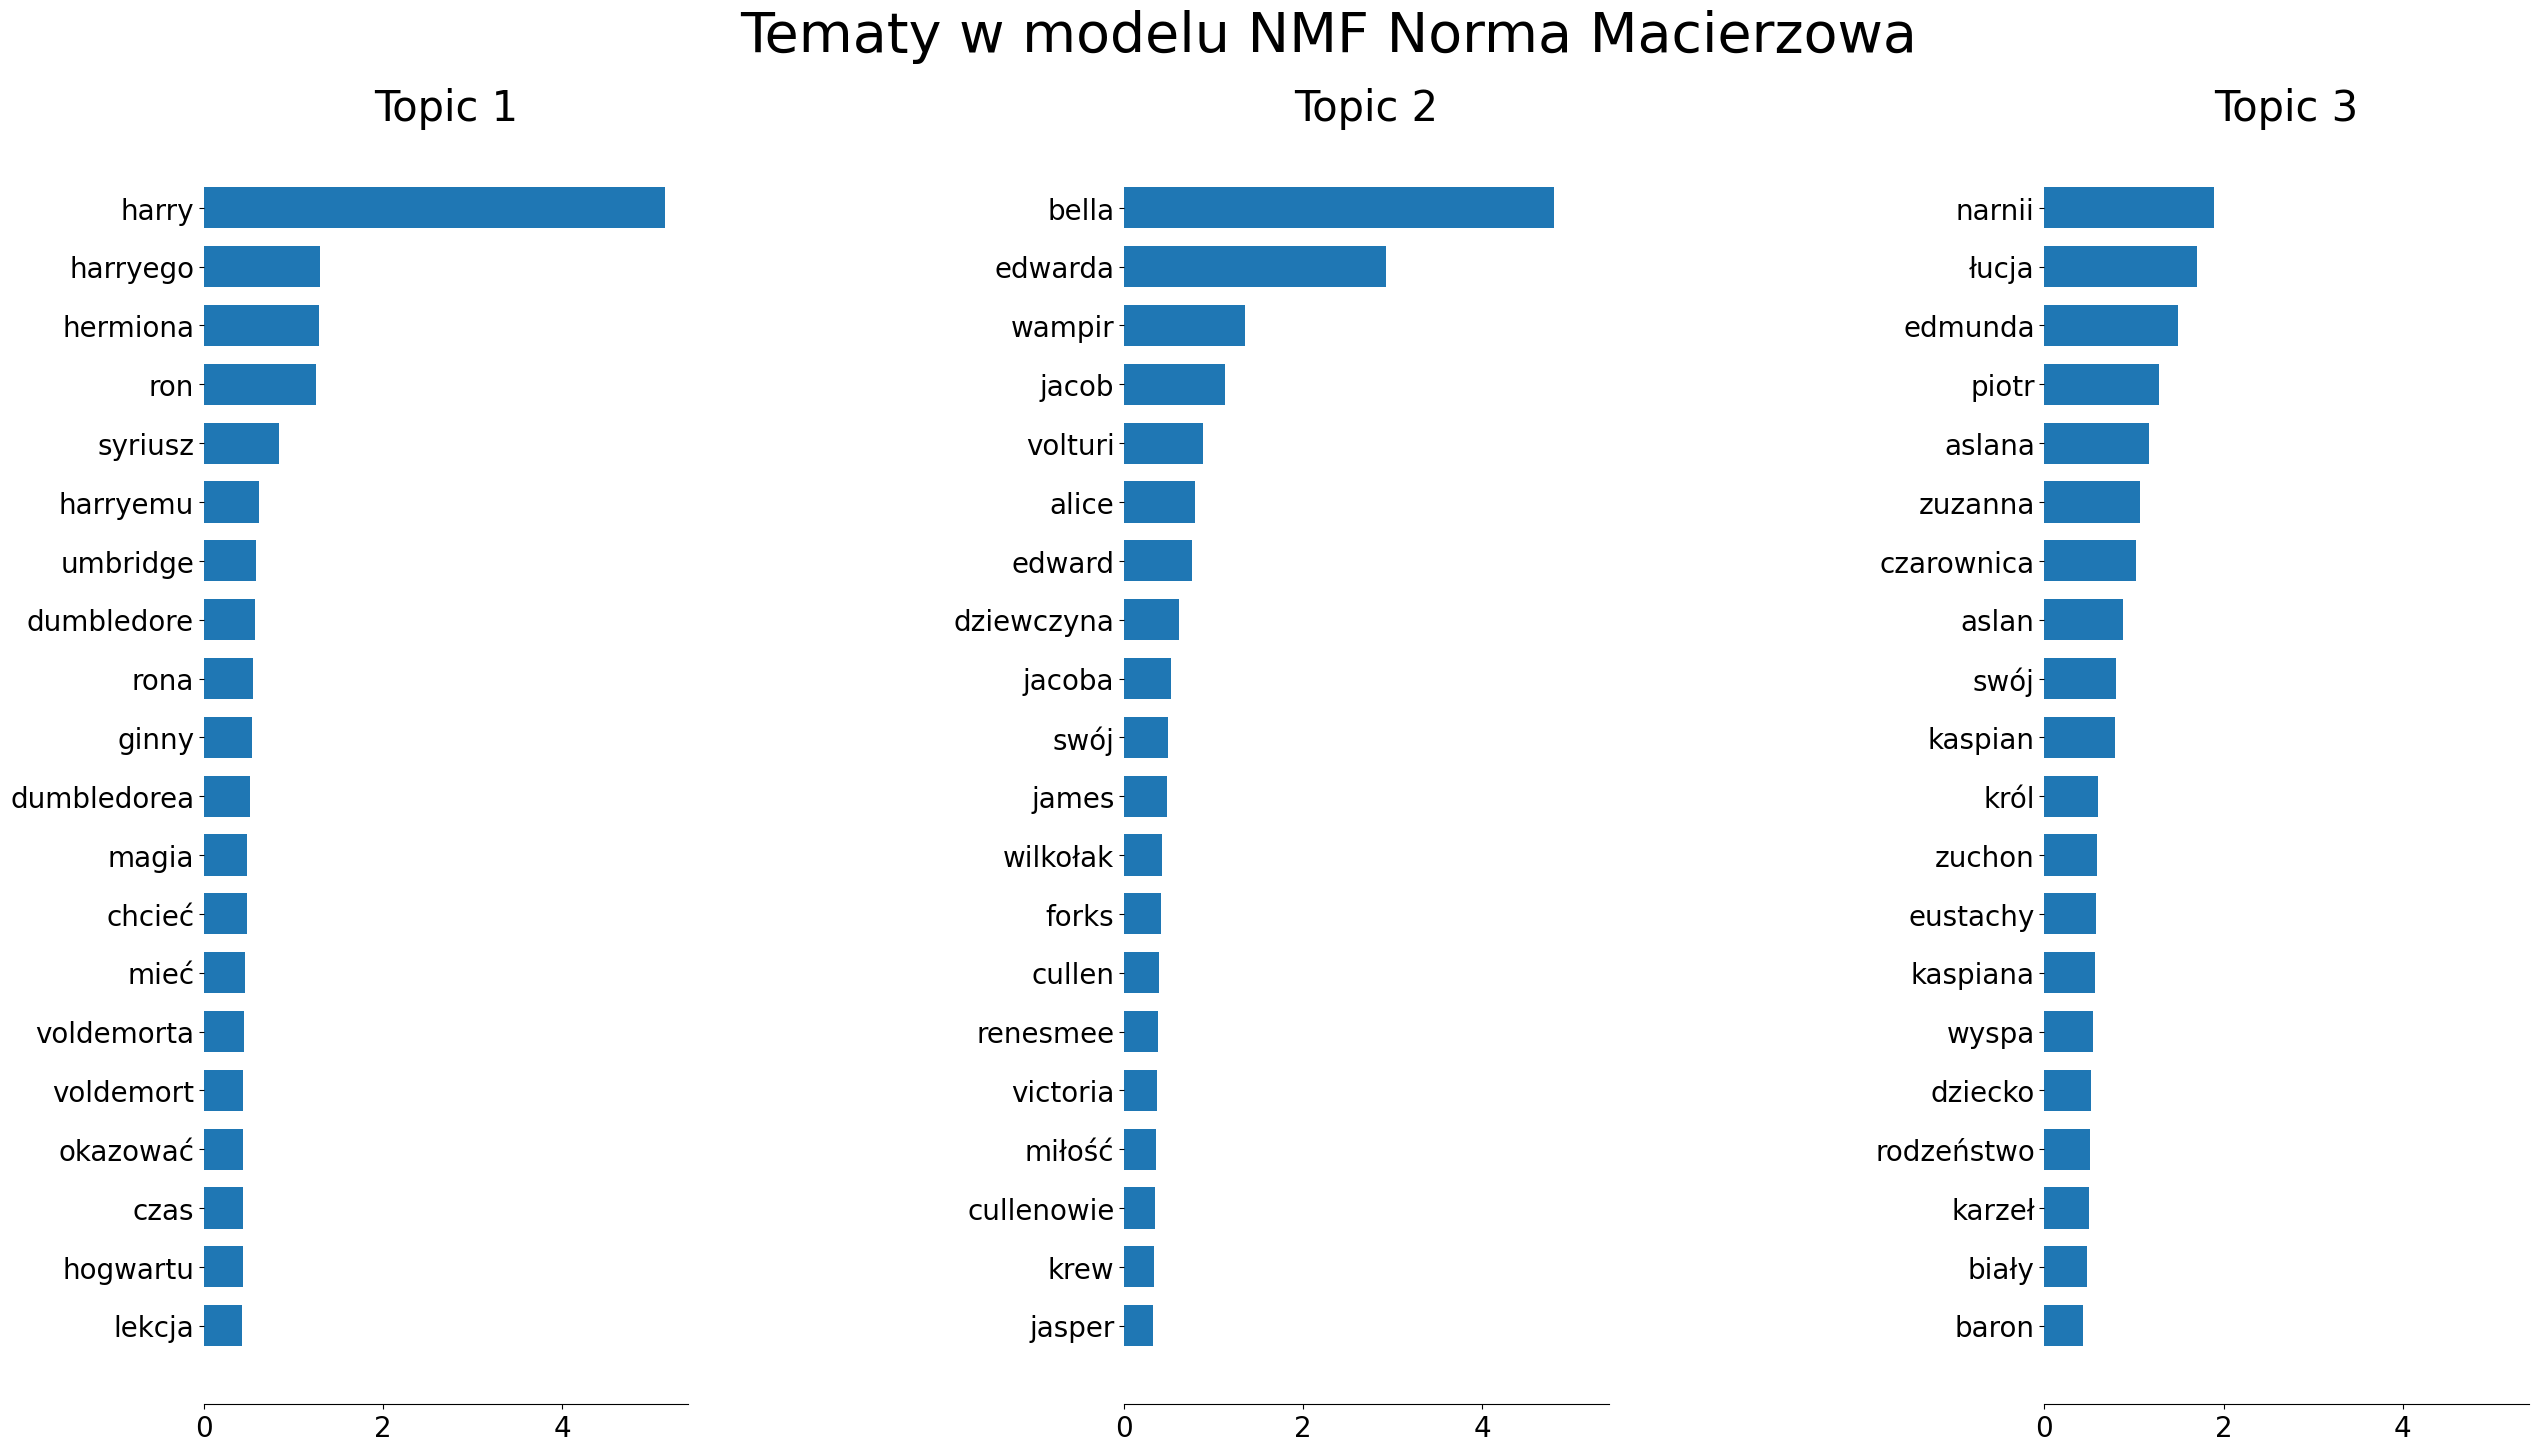

In [15]:
nmf_fm=NMF(
    n_components=n_components,
    random_state=1,
    alpha_H=0.00005,
    alpha_W=.00005,
    l1_ratio=.5)
nmf_fm.fit(counts_tfidf)
plot_top_words(nmf_fm, feature_names, n_top_features, "Tematy w modelu NMF Norma Macierzowa", size)

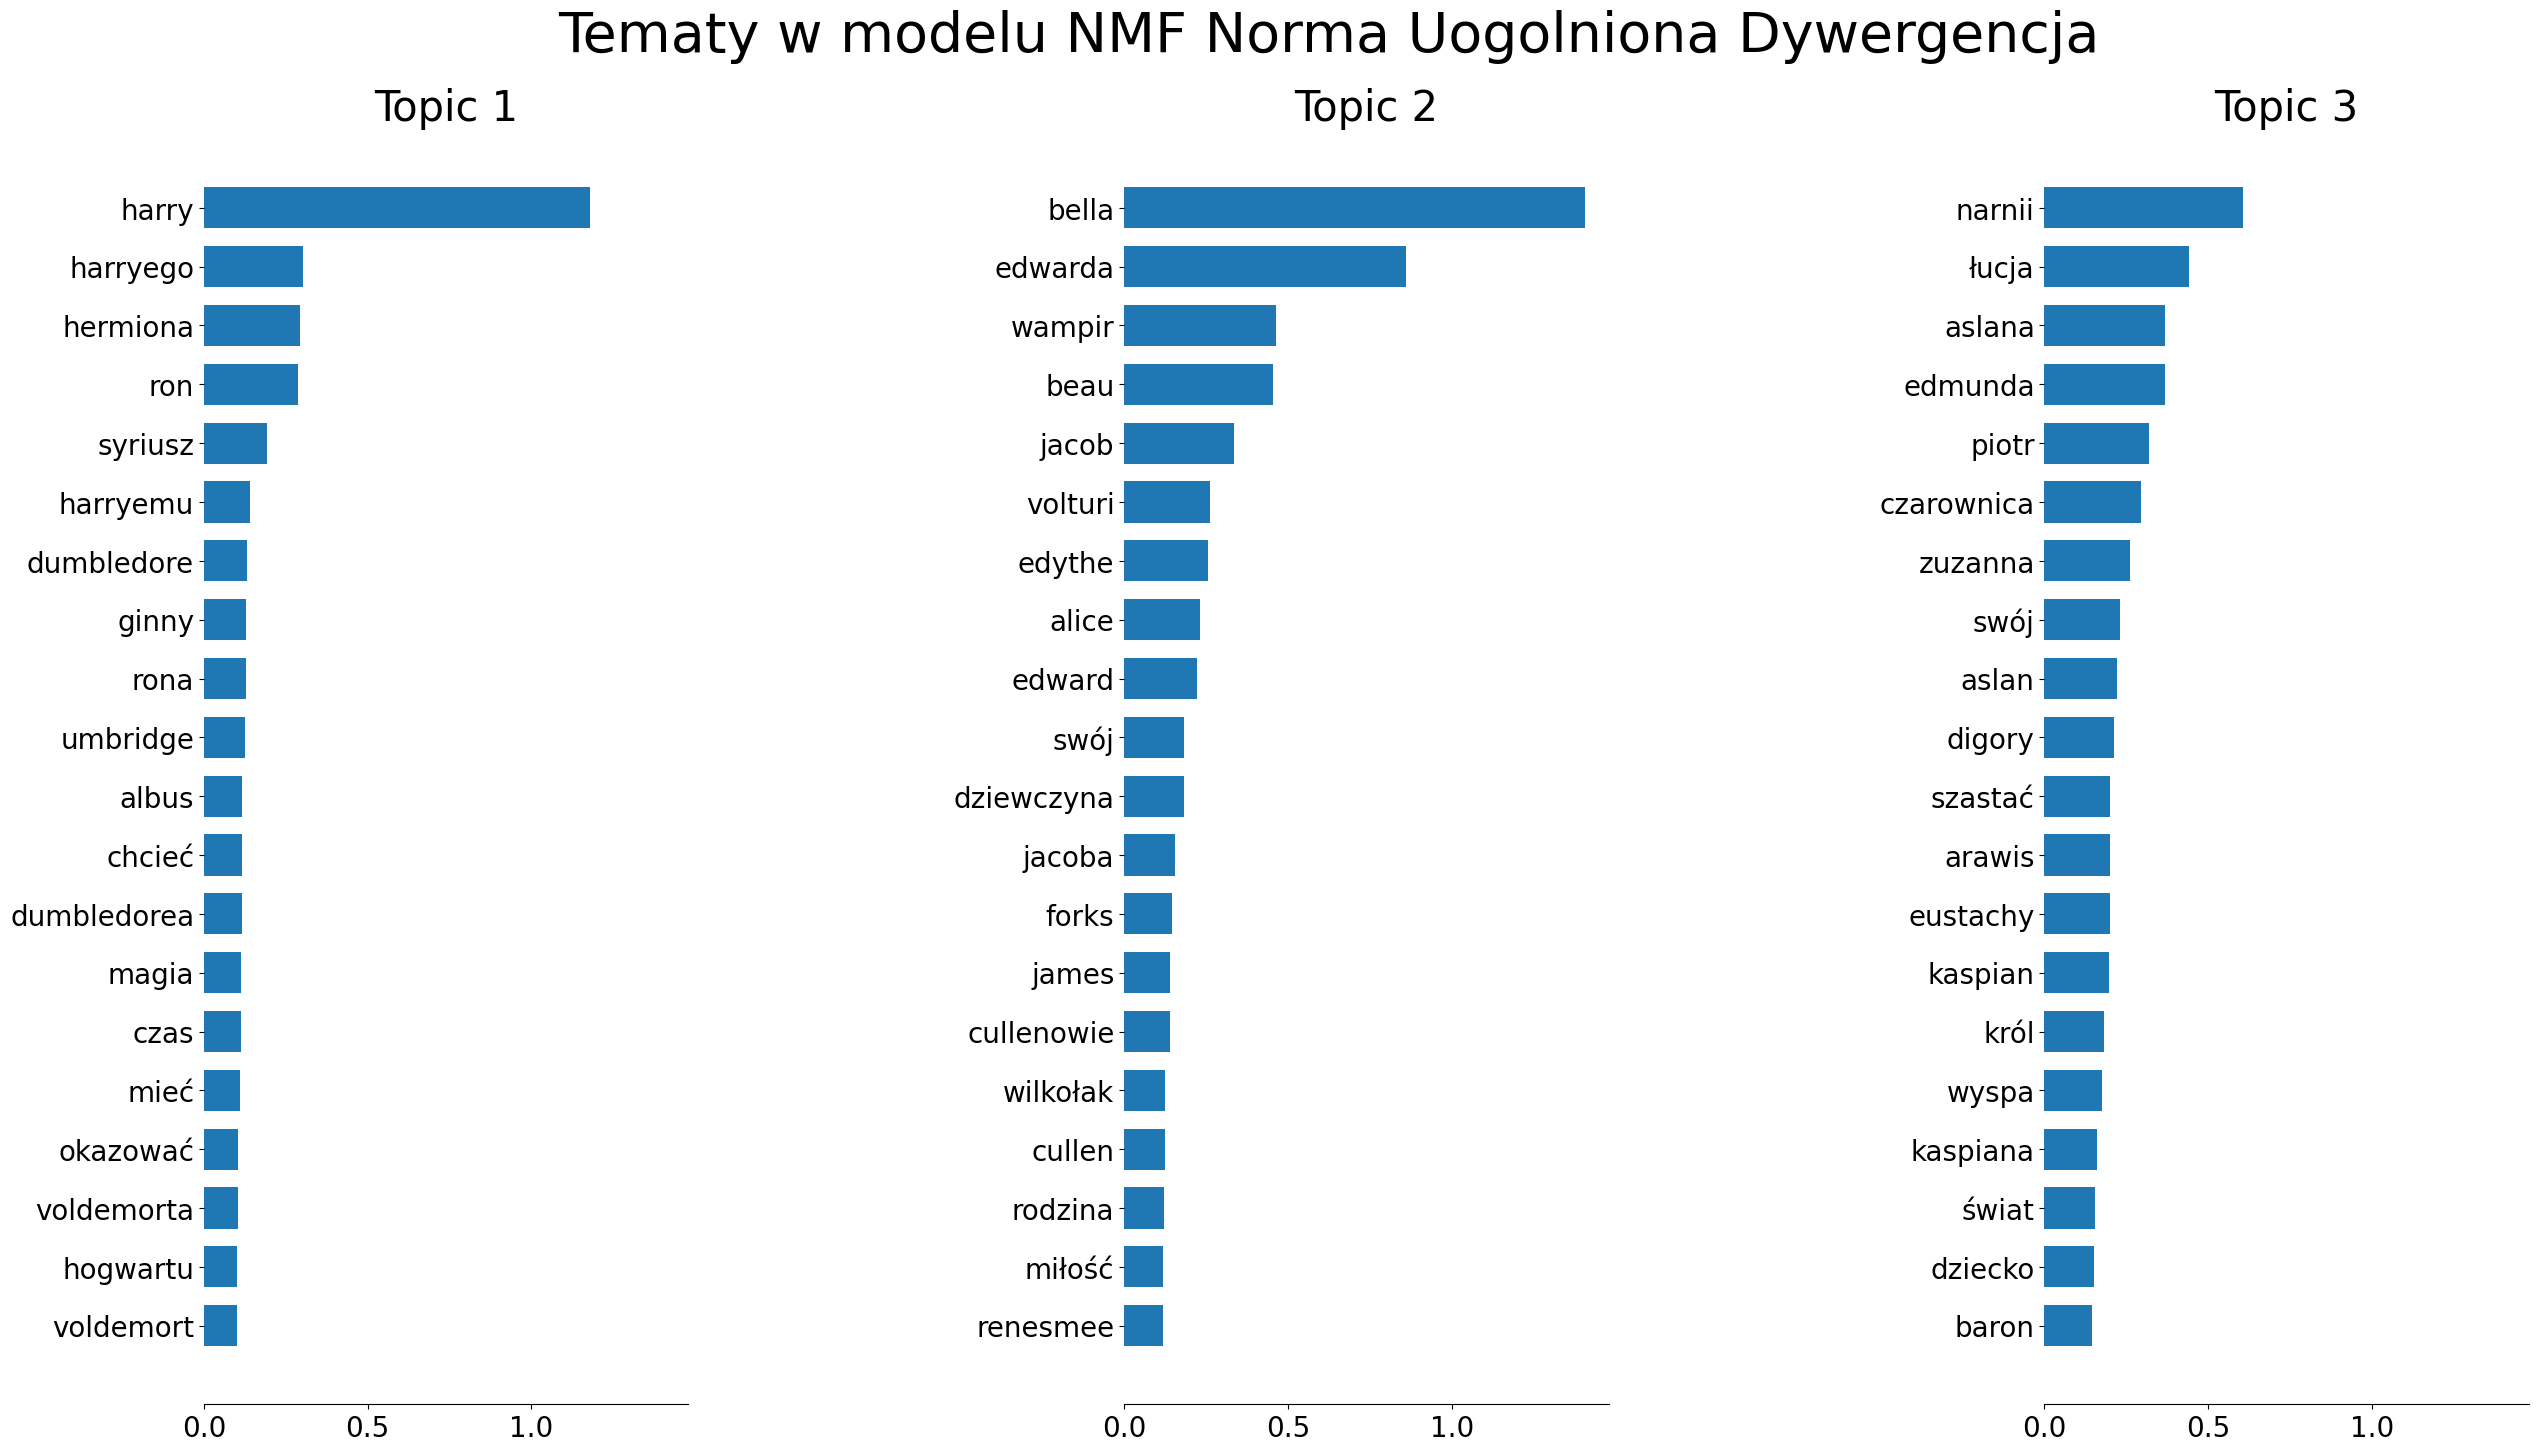

In [16]:
nmf_kl=NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_H=0.00005,
    alpha_W=.00005,
    l1_ratio=.5)
nmf_kl.fit(counts_tfidf)
plot_top_words(nmf_kl, feature_names, n_top_features, "Tematy w modelu NMF Norma Uogolniona Dywergencja", size)

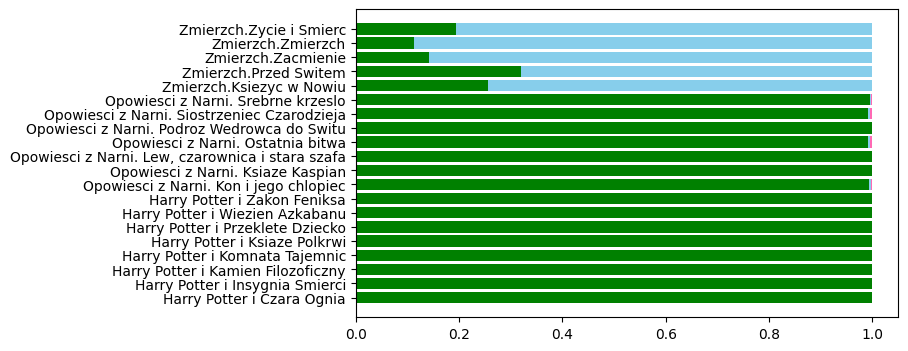

In [17]:
docs_topics = pd.DataFrame(lda.transform(counts_tf), columns=['Topic 1' ,'Topic 2','Topic 3'])
docs_topics.index = [file_name.replace('.txt', '') for file_name in files_names]
plt.figure(figsize=(7,4))
colors = ['green', 'skyblue', 'hotpink']
left = [0] * len(docs_topics)
for i, col in enumerate(docs_topics.columns):
    plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color=colors[i])
    left = [left[j]+docs_topics[col].iloc[j] for j in range(len(docs_topics))]

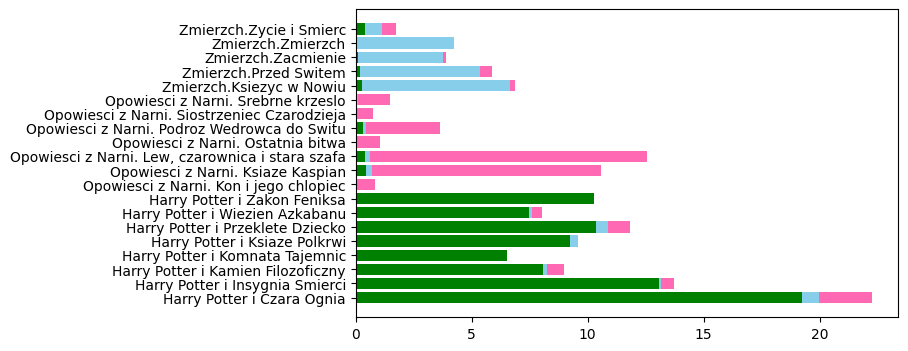

In [18]:
docs_topics = pd.DataFrame(nmf_fm.transform(counts_tf), columns=['Topic 1' ,'Topic 2','Topic 3'])
docs_topics.index = [file_name.replace('.txt', '') for file_name in files_names]
plt.figure(figsize=(7,4))
colors = ['green', 'skyblue', 'hotpink']
left = [0] * len(docs_topics)
for i, col in enumerate(docs_topics.columns):
    plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color=colors[i])
    left = [left[j]+docs_topics[col].iloc[j] for j in range(len(docs_topics))]
plt.show()

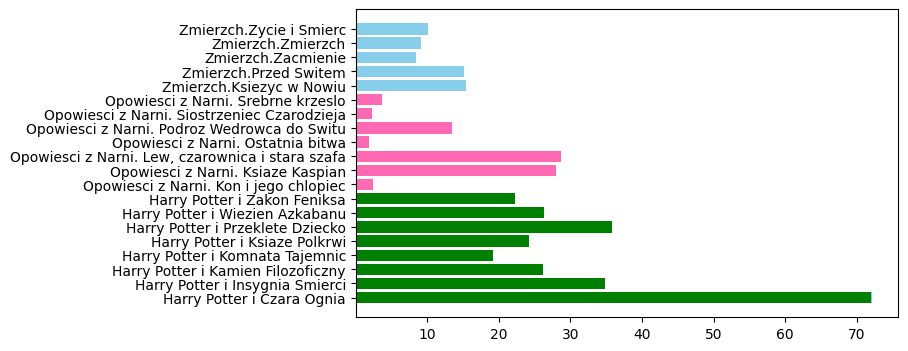

In [19]:
docs_topics = pd.DataFrame(nmf_kl.transform(counts_tf), columns=['Topic 1' ,'Topic 2','Topic 3'])
docs_topics.index = [file_name.replace('.txt', '') for file_name in files_names]
plt.figure(figsize=(7,4))
colors = ['green', 'skyblue', 'hotpink']
left = [0] * len(docs_topics)
for i, col in enumerate(docs_topics.columns):
    plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color=colors[i])
    left = [left[j]+docs_topics[col].iloc[j] for j in range(len(docs_topics))]
plt.show()

## Analiza skupień

In [20]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [21]:
cs = cosine_similarity(counts_tfidf, counts_tfidf).flatten().reshape(20,20)
cs 

array([[1.        , 0.56459379, 0.49996461, 0.44767262, 0.52149357,
        0.40078115, 0.50897954, 0.53655369, 0.04978333, 0.10380695,
        0.10404309, 0.07112769, 0.12963401, 0.05238638, 0.0743698 ,
        0.07523301, 0.07354802, 0.06382731, 0.04943919, 0.0468746 ],
       [0.56459379, 1.        , 0.52301458, 0.49743212, 0.61369303,
        0.39672906, 0.47693502, 0.63244733, 0.04452801, 0.07904904,
        0.08926707, 0.07568825, 0.07242286, 0.02615922, 0.04975714,
        0.05577804, 0.0517892 , 0.04293069, 0.03814857, 0.03725055],
       [0.49996461, 0.52301458, 1.        , 0.47679174, 0.48641542,
        0.36808347, 0.43473603, 0.49712448, 0.05076594, 0.09897991,
        0.10091305, 0.04079342, 0.10974422, 0.03241139, 0.05802386,
        0.05857255, 0.05648956, 0.04425854, 0.0489129 , 0.04335849],
       [0.44767262, 0.49743212, 0.47679174, 1.        , 0.52977708,
        0.32367346, 0.388489  , 0.49314055, 0.02776739, 0.06415942,
        0.06340507, 0.04338913, 0.06073124, 0

In [22]:
clustering = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward",
    compute_distances=True
).fit(cs)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0],
      dtype=int64)

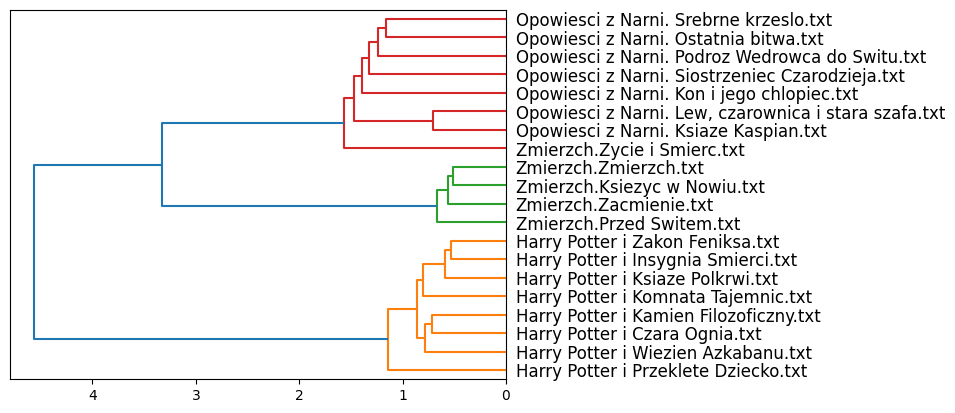

In [23]:
plot_dendrogram(
    clustering,
    labels=files_names,
    truncate_mode = 'level',
    orientation = 'left'
)
plt.show()

In [24]:
ed = euclidean_distances(counts_tfidf, counts_tfidf).flatten().reshape(20,20)
ed 

array([[0.        , 0.93317331, 1.00003539, 1.05102558, 0.97827034,
        1.09473179, 0.99097978, 0.96275263, 1.37856206, 1.33880025,
        1.33862386, 1.36299106, 1.31936802, 1.37667252, 1.36061031,
        1.35997573, 1.36121415, 1.36833672, 1.37881167, 1.38067042],
       [0.93317331, 0.        , 0.97671431, 1.0025646 , 0.87898461,
        1.098427  , 1.02280495, 0.85738284, 1.38236897, 1.35716687,
        1.34961693, 1.35964094, 1.36204048, 1.39559362, 1.37858106,
        1.37420665, 1.37710624, 1.38352399, 1.38697616, 1.38762347],
       [1.00003539, 0.97671431, 0.        , 1.02294502, 1.01349354,
        1.1242033 , 1.06326287, 1.00287139, 1.37784909, 1.3424009 ,
        1.34096006, 1.38506792, 1.33435811, 1.39110647, 1.37257141,
        1.3721716 , 1.37368878, 1.38256389, 1.37919331, 1.38321474],
       [1.05102558, 1.0025646 , 1.02294502, 0.        , 0.96976587,
        1.16303614, 1.10590325, 1.00683609, 1.39444083, 1.36809399,
        1.36864526, 1.38319259, 1.3705975 , 1

In [25]:
clustering = AgglomerativeClustering(
    n_clusters=3,
    affinity="precomputed",
    linkage="complete",
    compute_distances=True
).fit(ed)
clustering.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

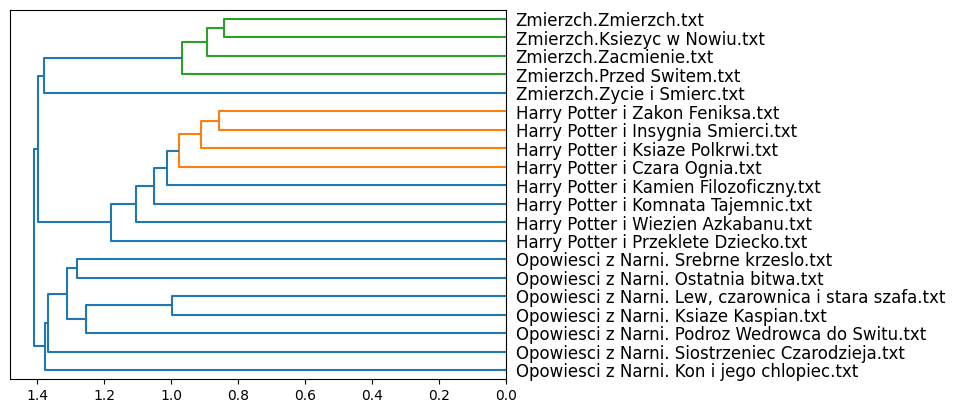

In [26]:
plot_dendrogram(
    clustering,
    labels=files_names,
    truncate_mode = 'level',
    orientation = 'left'
)
plt.show()

## N-Gramy

In [27]:
documents_tokenized = {}
for key in documents:
    documents_tokenized[key]=word_tokenize(documents[key], language='polish')
print(json.dumps(documents_tokenized, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": [
        "lord",
        "voldemort",
        "wraz",
        "sługa",
        "glizdogonem",
        "przybywać",
        "dom",
        "należący",
        "niegdyś",
        "rodzina",
        "riddleów",
        "położony",
        "little",
        "hangleton",
        "układać",
        "plan",
        "dotyczyć",
        "zamordować",
        "harryego",
        "pottera",
        "mieć",
        "pomóc",
        "czarny",
        "odzyskanie",
        "dawny",
        "moc",
        "mowa",
        "wierna",
        "sługa",
        "czarny",
        "wkrótce",
        "mieć",
        "znaleźć",
        "hogwarcie",
        "słyszeć",
        "mieszkać",
        "nieopodal",
        "ogrodnik",
        "frank",
        "bryka",
        "voldemort",
        "odkrywać",
        "mężczyzna",
        "podsłuchiwać",
        "zapraszać",
        "środek",
        "uśmiercać",
        "Harry",
        "budzić",
        "przerażający",
        

In [28]:
for title in documents_tokenized:
    print(list(ngrams(documents[title],3)))

[('l', 'o', 'r'), ('o', 'r', 'd'), ('r', 'd', ' '), ('d', ' ', 'v'), (' ', 'v', 'o'), ('v', 'o', 'l'), ('o', 'l', 'd'), ('l', 'd', 'e'), ('d', 'e', 'm'), ('e', 'm', 'o'), ('m', 'o', 'r'), ('o', 'r', 't'), ('r', 't', ' '), ('t', ' ', 'w'), (' ', 'w', 'r'), ('w', 'r', 'a'), ('r', 'a', 'z'), ('a', 'z', ' '), ('z', ' ', 's'), (' ', 's', 'ł'), ('s', 'ł', 'u'), ('ł', 'u', 'g'), ('u', 'g', 'a'), ('g', 'a', ' '), ('a', ' ', 'g'), (' ', 'g', 'l'), ('g', 'l', 'i'), ('l', 'i', 'z'), ('i', 'z', 'd'), ('z', 'd', 'o'), ('d', 'o', 'g'), ('o', 'g', 'o'), ('g', 'o', 'n'), ('o', 'n', 'e'), ('n', 'e', 'm'), ('e', 'm', ' '), ('m', ' ', 'p'), (' ', 'p', 'r'), ('p', 'r', 'z'), ('r', 'z', 'y'), ('z', 'y', 'b'), ('y', 'b', 'y'), ('b', 'y', 'w'), ('y', 'w', 'a'), ('w', 'a', 'ć'), ('a', 'ć', ' '), ('ć', ' ', 'd'), (' ', 'd', 'o'), ('d', 'o', 'm'), ('o', 'm', ' '), ('m', ' ', 'n'), (' ', 'n', 'a'), ('n', 'a', 'l'), ('a', 'l', 'e'), ('l', 'e', 'ż'), ('e', 'ż', 'ą'), ('ż', 'ą', 'c'), ('ą', 'c', 'y'), ('c', 'y', ' 

Harry Potter i Czara Ognia.txt


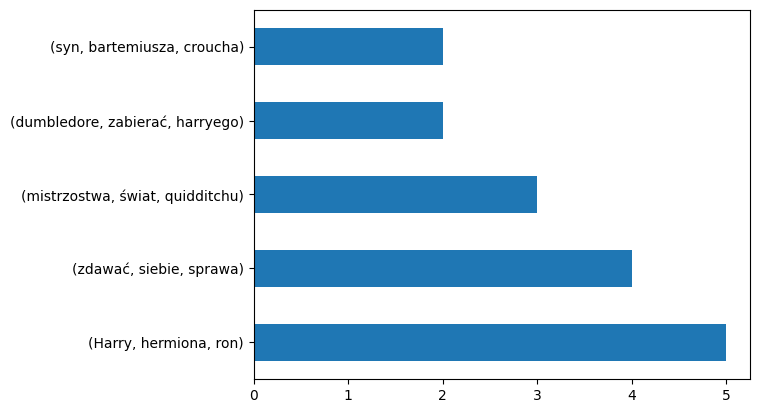

Harry Potter i Insygnia Smierci.txt


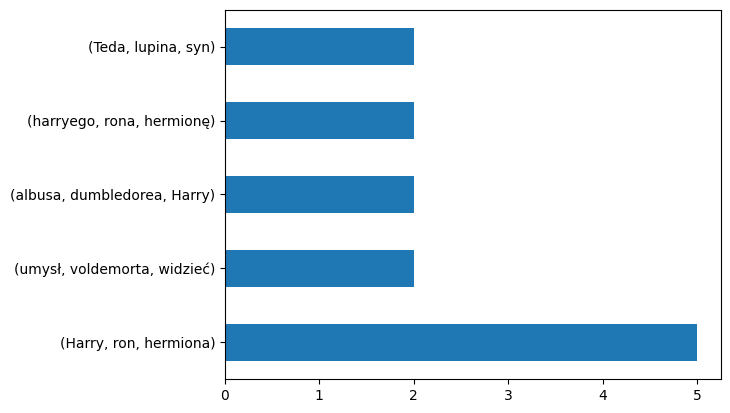

Harry Potter i Kamien Filozoficzny.txt


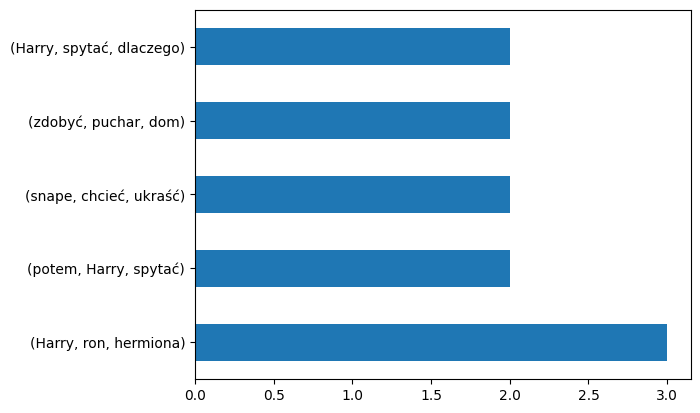

Harry Potter i Komnata Tajemnic.txt


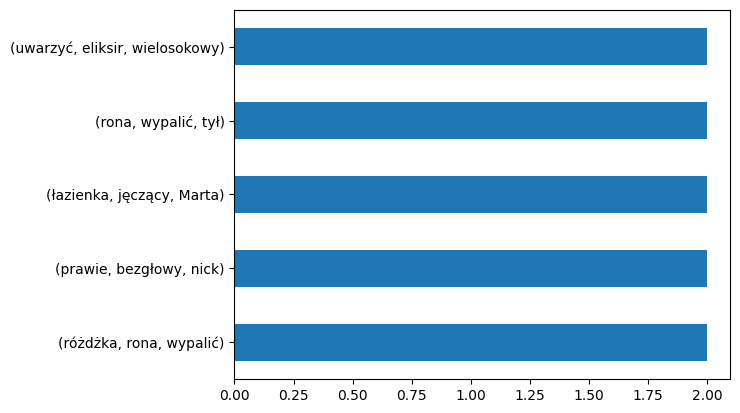

Harry Potter i Ksiaze Polkrwi.txt


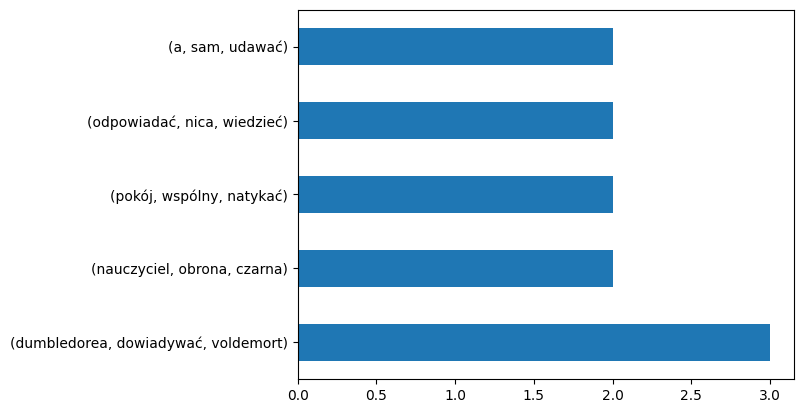

Harry Potter i Przeklete Dziecko.txt


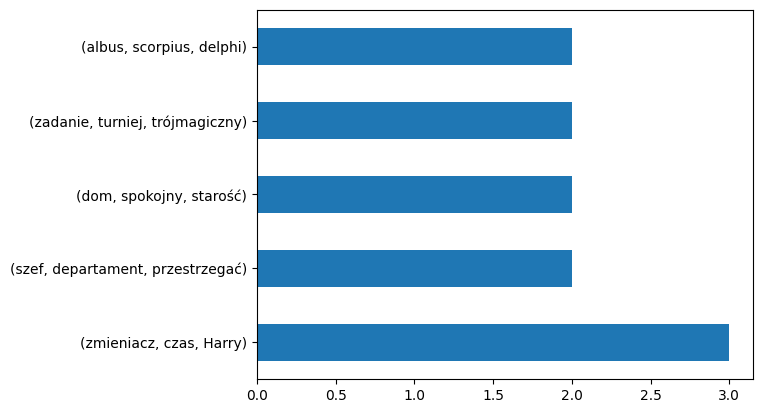

Harry Potter i Wiezien Azkabanu.txt


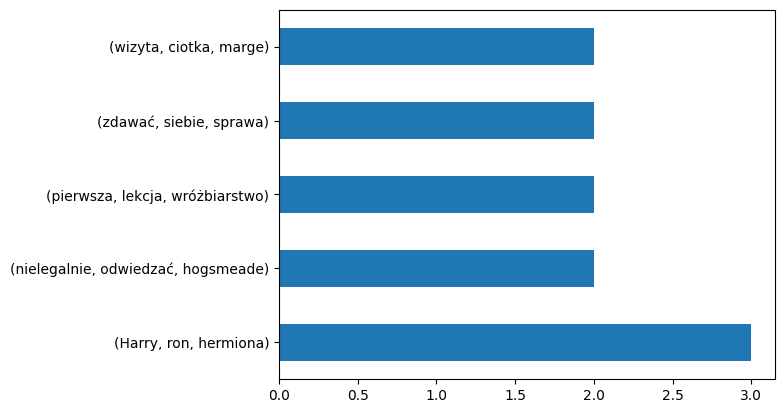

Harry Potter i Zakon Feniksa.txt


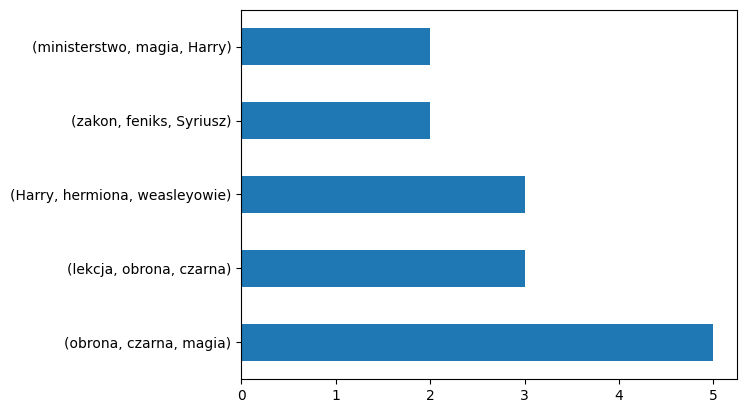

Opowiesci z Narni. Kon i jego chlopiec.txt


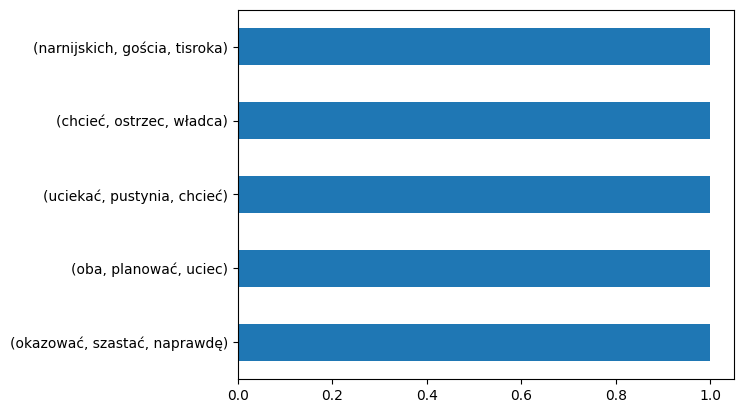

Opowiesci z Narni. Ksiaze Kaspian.txt


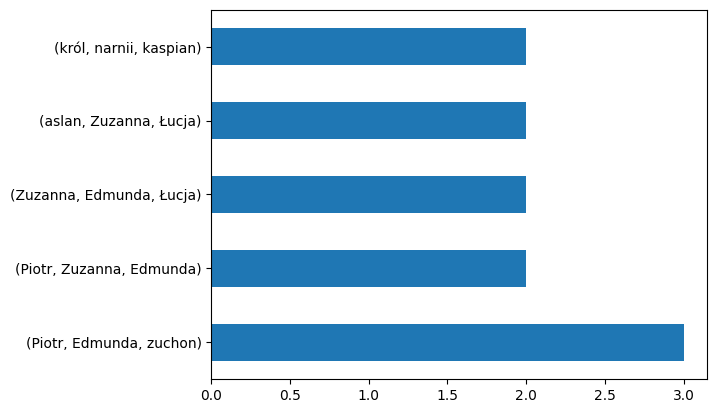

Opowiesci z Narni. Lew, czarownica i stara szafa.txt


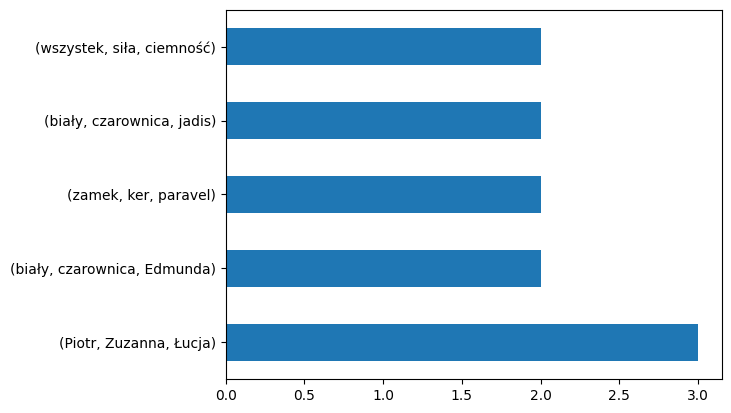

Opowiesci z Narni. Ostatnia bitwa.txt


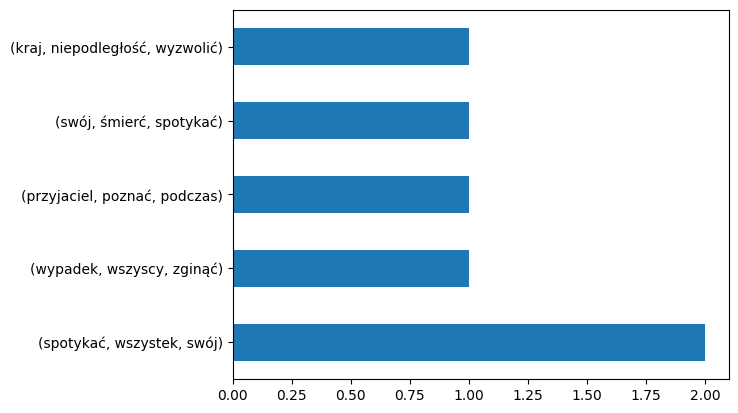

Opowiesci z Narni. Podroz Wedrowca do Switu.txt


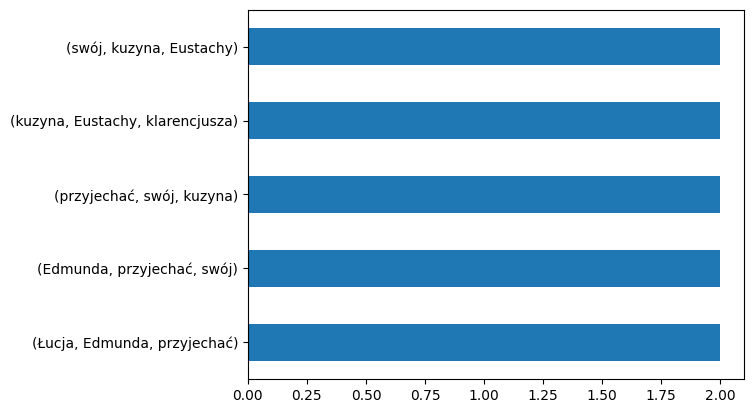

Opowiesci z Narni. Siostrzeniec Czarodzieja.txt


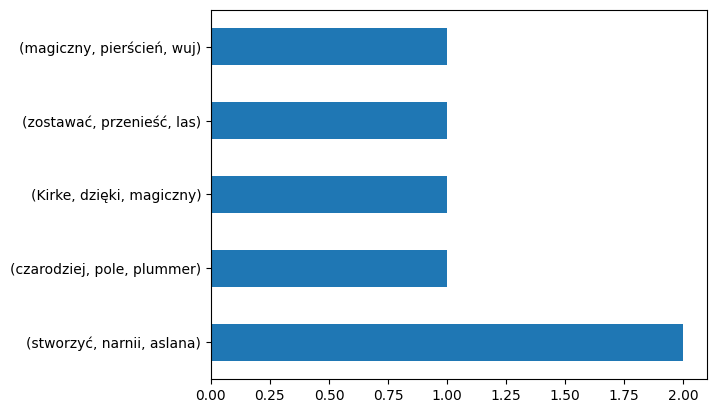

Opowiesci z Narni. Srebrne krzeslo.txt


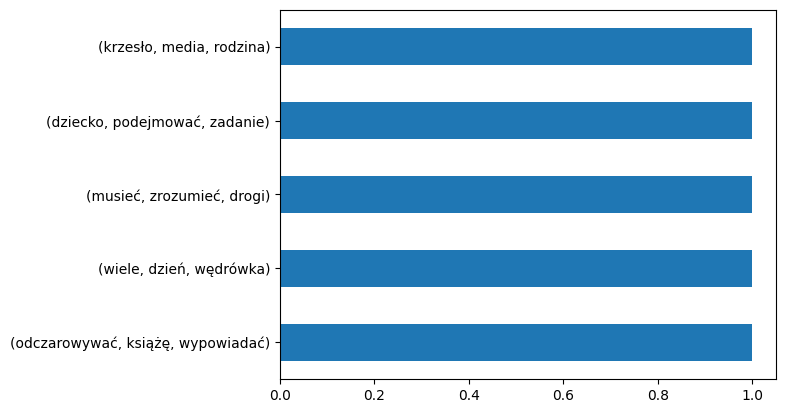

Zmierzch.Ksiezyc w Nowiu.txt


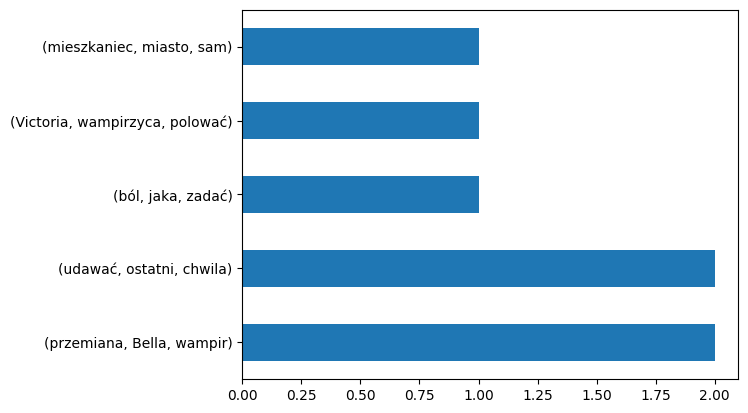

Zmierzch.Przed Switem.txt


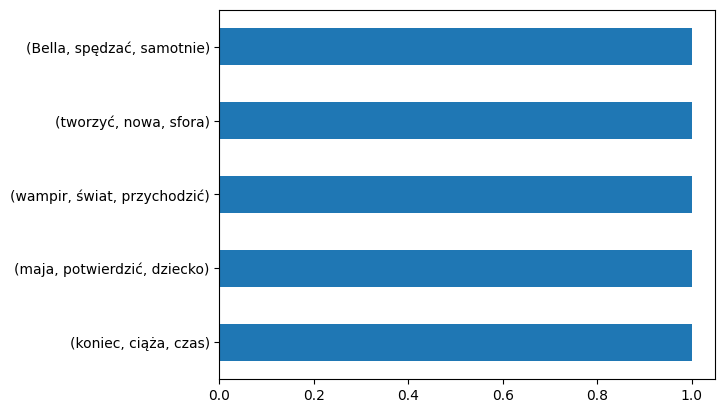

Zmierzch.Zacmienie.txt


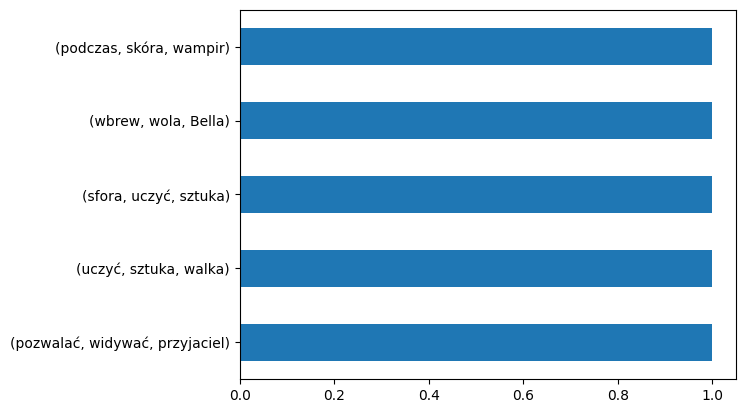

Zmierzch.Zmierzch.txt


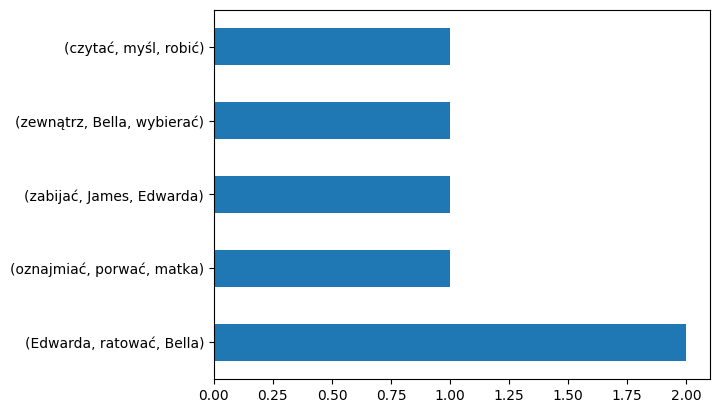

Zmierzch.Zycie i Smierc.txt


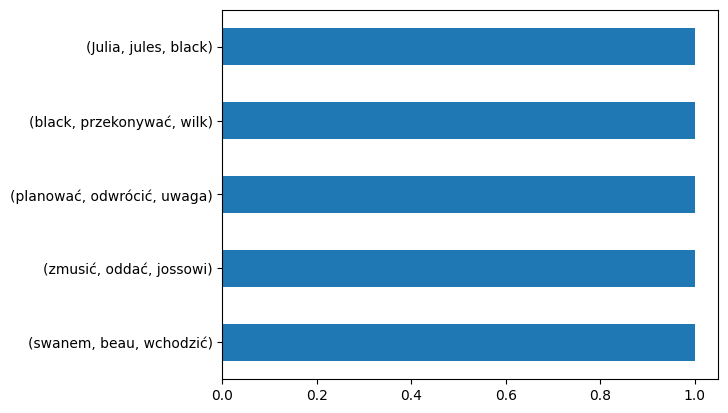

In [29]:
for title in documents_tokenized:
    n_gram=pd.Series(ngrams(documents_tokenized[title],3)).value_counts()
    print(title)
    n_gram[:5].plot.barh()
    plt.show()

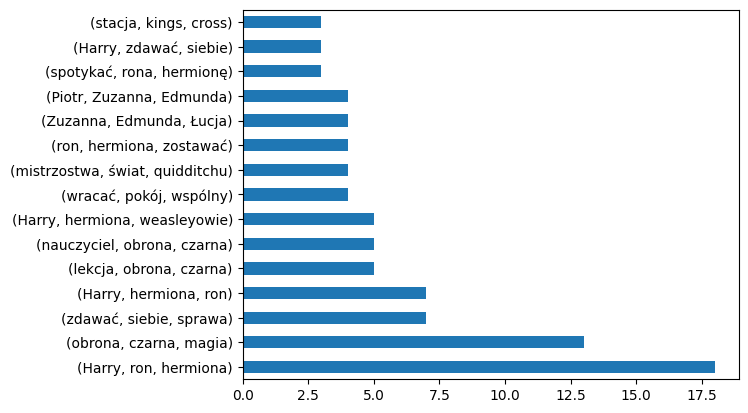

In [30]:
texts = ' '.join(docs['content']).split(" ")
n_gram=pd.Series(ngrams(texts,3)).value_counts()
n_gram[:15].plot.barh()
plt.show()